<a href="https://colab.research.google.com/github/hecshzye/crypto-price-predictions-2022/blob/main/crypto_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  💲 Bitcoin Price Prediction using Deep Learning 💲

- Time series forecasting using TensorFlow to predict the price of Bitcoin (BTC) 

- The dataset used in this project is from CoinDesk: https://www.coindesk.com/price/bitcoin/

- Link to the dataset used (2014/03/11-2022/01/18): https://raw.githubusercontent.com/hecshzye/crypto-price-predictions-2022/main/BTC_USD_2014-11-04_2022-01-18-CoinDesk.csv


- **`LEGAL NOTE`** ⚠️
     
     - **`Bitcoin (BTC) Price Prediction Using Deep Learning` project and its   `findings, conclusions and models` are `STRICTLY NOT FINANCIAL ADVICE` in any manner.**

     - **`ANY FINDINGS AND PREDICTIONS DERIVED FROM THIS MODEL IS ONLY FOR EDUCATIONAL, LEARNING AND RESEARCH PURPOSES`.**


In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
import tensorflow as tf
import csv
import datetime

In [4]:
# helper function pre-written
!wget https://raw.githubusercontent.com/hecshzye/crypto-price-predictions-2022/main/helper_functions.py

--2022-01-18 08:14:39--  https://raw.githubusercontent.com/hecshzye/crypto-price-predictions-2022/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6442 (6.3K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   6.29K  --.-KB/s    in 0s      

2022-01-18 08:14:39 (48.8 MB/s) - ‘helper_functions.py’ saved [6442/6442]



In [5]:
from helper_functions import create_tensorboard_callback, create_confusion_matrix, plot_loss_curves

# Data import and Exploratory Data Analysis 

In [6]:
# dataset import
!wget https://raw.githubusercontent.com/hecshzye/crypto-price-predictions-2022/main/BTC_USD_2014-11-04_2022-01-18-CoinDesk.csv

--2022-01-18 08:16:53--  https://raw.githubusercontent.com/hecshzye/crypto-price-predictions-2022/main/BTC_USD_2014-11-04_2022-01-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156982 (153K) [text/plain]
Saving to: ‘BTC_USD_2014-11-04_2022-01-18-CoinDesk.csv’

BTC_USD_2014-11-04_ 100%[===================>] 153.30K  --.-KB/s    in 0.02s   

2022-01-18 08:16:53 (8.70 MB/s) - ‘BTC_USD_2014-11-04_2022-01-18-CoinDesk.csv’ saved [156982/156982]



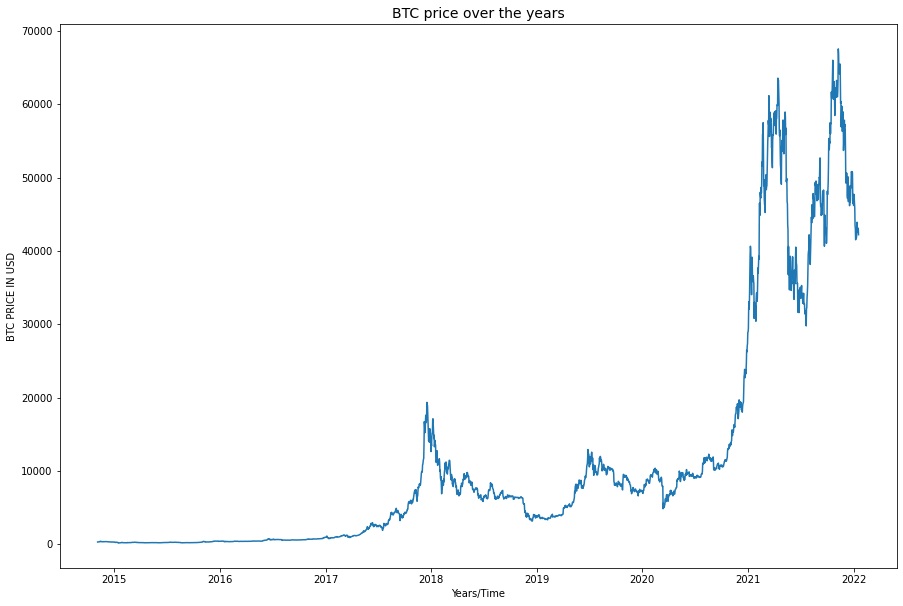

In [14]:
# Importing, formatting and EDA
from datetime import datetime
timesteps = []
btc_price = []
with open("/content/BTC_USD_2014-11-04_2022-01-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[2]))

# Plotting 
plt.figure(figsize=(15, 10))
plt.plot(timesteps, btc_price)
plt.title("BTC price over the years", fontsize=14)
plt.ylabel("BTC PRICE IN USD")
plt.xlabel("Years/Time");

In [19]:
# Function for plots
def plot_ts(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time scale")
  plt.ylabel("BTC Price in USD")
  if label:
    plt.legend(fontsize=12)
  plt.grid(False)  

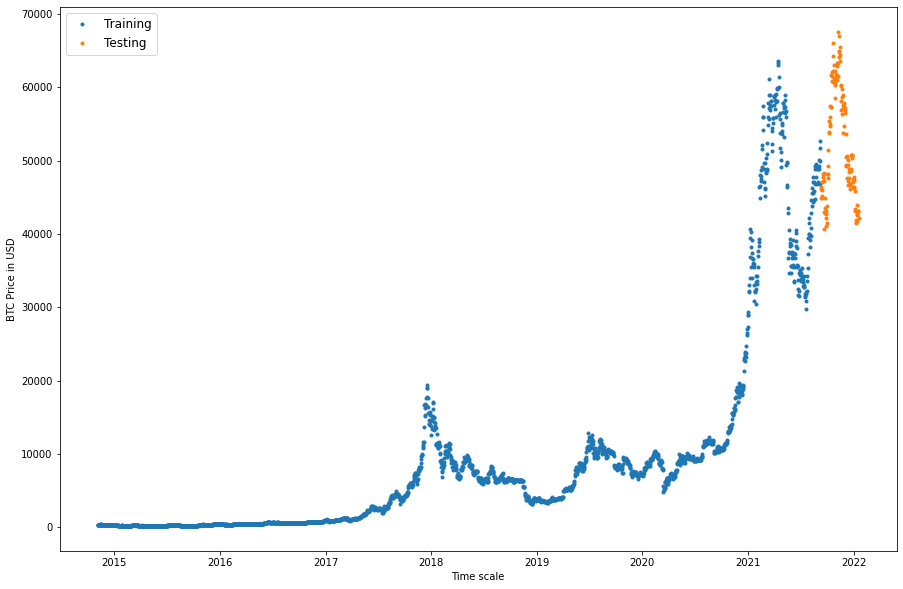

In [20]:
# Splitting Train & Test
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()
split_size = int(0.95 * len(prices))
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

# Plotting the split
plt.figure(figsize=(15, 10))
plot_ts(timesteps=X_train, values=y_train, label="Training")
plot_ts(timesteps=X_test, values=y_test, label="Testing")

In [ ]:
# 